# Machine learning techniques for diagnosis of malignant pleural mesothelioma

MPM is a highly aggressive tumor of the serous membranes, which in humans results from exposure to **asbestos** and **asbestiform fibers**. It is a fatal cancer and a malignancy that is resistant to the common tumor directed therapies.

Overall: 
* around half of people diagnosed with mesothelioma will live at least a year after the diagnosis
* around 10% of people with mesothelioma will live at least 5 years after diagnosis

The symptoms of mesothelioma develop usually gradually over time and don't appear until several decades (typically 20 years) after exposure to asbestos ! For mesothelioma in the lining of the lungs, they include :
* chest pain
* shortness of breath
* fatigue
* fever and sweating
* couch
* loss of appetite and unexplained weight loss
* swollen fingertips

As for mesothelioma in the lining of the tummy, they include :
* swelling or tummy pain
* feeling sick
* loss of appetite and unexplained weight loss
* diarrhoea or consitupation

Diagnostics of mesothelioma:
* X-ray of chest or tummy
* CT scan
* fluid drainage
* thoracoscopy or laparoscopy

## Findings in the studied paper 

The paper compares the results of the multilayer neural network (MLNN) structure and Artificial Immune Systems (AIS) on MPM diagnosis. The dataset used comes from a faculty of medecine's database using patient's hospital reports. This dataset includes 324 patients suffering from variety of MPM disease. Each of them have 34 features and diagnostic tests of each patient were recorded by an attending physician.

## Data importation

In [211]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(10)

# configuration bibliotheque pour les graphiques
%matplotlib inline 

os.getcwd()

'/Users/romanelgff/Documents/Master/M2/S1/R1/ML/ml-mesothelioma'

In [212]:
df = pd.read_excel("mesothelioma_dataset.xlsx")
df = df.drop(columns = ["diagnosis method"]) # variable correlee avec la variable explicative donc a enlever (d'apres Valérie)
df.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,keep side,cytology,duration of symptoms,dyspnoea,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [213]:
# dimensions
df.shape 

(324, 34)

In [214]:
# nombre total d'éléments
df.size

11016

In [215]:
# removing blank spaces in column names
df.columns = df.columns.str.replace(' ', '_')
df.head()

,age,gender,city,asbestos_exposure,type_of_MM,duration_of_asbestos_exposure,keep_side,cytology,duration_of_symptoms,dyspnoea,...,pleural_lactic_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead_or_not,pleural_effusion,pleural_thickness_on_tomography,pleural_level_of_acidity_(pH),C-reactive_protein_(CRP),class_of_diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


Details on: https://www.overleaf.com/2229811927sftxcwqrxthn

In [216]:
# column types
df.dtypes # some issue with type of categorical/boolean variables

age                                 float64
gender                                int64
city                                  int64
asbestos_exposure                     int64
type_of_MM                          float64
duration_of_asbestos_exposure       float64
keep_side                             int64
cytology                              int64
duration_of_symptoms                float64
dyspnoea                              int64
ache_on_chest                         int64
weakness                              int64
habit_of_cigarette                    int64
performance_status                    int64
white_blood                         float64
cell_count_(WBC)                      int64
hemoglobin_(HGB)                      int64
platelet_count_(PLT)                float64
sedimentation                       float64
blood_lactic_dehydrogenise_(LDH)    float64
alkaline_phosphatise_(ALP)          float64
total_protein                       float64
albumin                         

In [217]:
df["class_of_diagnosis"].unique() # target variable (boolean)

array([1, 2])

In [218]:
df["class_of_diagnosis"] = df["class_of_diagnosis"].apply(lambda x: 1 if x == 2 else 0)

In [219]:
df["city"].unique()

array([0, 1, 3, 4, 5, 2, 6, 7, 8])

In [220]:
df["type_of_MM"].unique() # float instead of int

array([0., 1., 2.])

In [221]:
df["type_of_MM"] = df["type_of_MM"].astype('int')

In [222]:
df["pleural_level_of_acidity_(pH)"].unique() # same

array([0., 1.])

In [223]:
df["pleural_level_of_acidity_(pH)"] = df["pleural_level_of_acidity_(pH)"].astype('int')

In [224]:
df["keep_side"].unique() # keep_side is lung_side in another paper using the same data

array([0, 1, 2])

In [225]:
df = df.rename(columns={'keep_side':'lung_side'}) # changing name
df.lung_side # 0 = no pleural plaque (1 or 2 = right or left side of the lung)

0      0
1      0
2      1
3      0
4      1
      ..
319    1
320    1
321    0
322    1
323    1
Name: lung_side, Length: 324, dtype: int64

In [226]:
df["cytology"].unique() # boolean

array([1, 0])

In [227]:
df["gender"].unique() # category

array([1, 0])

In [228]:
df["habit_of_cigarette"].unique() # categoryy

array([2, 3, 0, 1])

In [229]:
df["pleural_effusion"].unique() # boolean (need to be converted in int type)

array([0., 1.])

In [230]:
df["pleural_effusion"] = df["pleural_effusion"].astype('int')

In [231]:
df["pleural_thickness_on_tomography"].unique() # boolean (need to be converted in int type)

array([0., 1.])

In [232]:
df["pleural_thickness_on_tomography"] = df["pleural_thickness_on_tomography"].astype('int')

In [233]:
df["hemoglobin_(HGB)"].unique() # boolean

array([1, 0])

In [234]:
df["performance_status"].unique() # boolean

array([1, 0])

In [235]:
df["weakness"].unique() # boolean

array([0, 1])

In [236]:
df["ache_on_chest"].unique() # boolean

array([1, 0])

In [237]:
df["dyspnoea"].unique() # boolean

array([1, 0])

In [238]:
df["asbestos_exposure"].unique() # boolean

array([1, 0])

In [239]:
df.info() # no NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    float64
 1   gender                            324 non-null    int64  
 2   city                              324 non-null    int64  
 3   asbestos_exposure                 324 non-null    int64  
 4   type_of_MM                        324 non-null    int64  
 5   duration_of_asbestos_exposure     324 non-null    float64
 6   lung_side                         324 non-null    int64  
 7   cytology                          324 non-null    int64  
 8   duration_of_symptoms              324 non-null    float64
 9   dyspnoea                          324 non-null    int64  
 10  ache_on_chest                     324 non-null    int64  
 11  weakness                          324 non-null    int64  
 12  habit_of

In [240]:
df.describe()

,age,gender,city,asbestos_exposure,type_of_MM,duration_of_asbestos_exposure,lung_side,cytology,duration_of_symptoms,dyspnoea,...,pleural_lactic_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead_or_not,pleural_effusion,pleural_thickness_on_tomography,pleural_level_of_acidity_(pH),C-reactive_protein_(CRP),class_of_diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.759259,0.280864,5.442901,0.817901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,0.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.565308,0.450116,4.717792,0.386523,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,2.875000,1.000000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,0.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,0.000000,5.000000,1.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,0.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,7.000000,1.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,1.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,2.000000,1.000000,52.000000,1.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,1.000000


In [241]:
# changing names of columns with brackets in it
df = df.rename(columns={'platelet_count_(PLT)':'platelet_count'}) # changing name
df = df.rename(columns={'cell_count_(WBC)':'cell_count'}) # changing name
df = df.rename(columns={'hemoglobin_(HGB)':'hemoglobin'}) # changing name
df = df.rename(columns={'blood_lactic_dehydrogenise_(LDH)':'blood_lactic_dehydrogenise'}) 
df = df.rename(columns={'alkaline_phosphatise_(ALP)':'alkaline_phosphatise'}) 
df = df.rename(columns={'pleural_level_of_acidity_(pH)':'pleural_level_of_acidity'}) 
df = df.rename(columns={'C-reactive_protein_(CRP)':'C_reactive_protein'}) 

In [242]:
# converting categorical variables into "Categorical" pandas type
df["city"] = pd.Categorical(df["city"], ordered=False)
df["type_of_MM"] = pd.Categorical(df["type_of_MM"], ordered=False)
df["lung_side"] = pd.Categorical(df["lung_side"], ordered=False)
df["habit_of_cigarette"] = pd.Categorical(df["habit_of_cigarette"], ordered=False)
df["gender"] = pd.Categorical(df["gender"], ordered=False)
df["performance_status"] = pd.Categorical(df["performance_status"], ordered=False)

In [243]:
df_init = df.copy() # dataframe that will be used for MLP model

## Descriptive stats

### Univariate stats

In [244]:
# library & dataset
import seaborn as sns

# style 
sns.set(style="darkgrid")

In [245]:
df["type_of_MM"].value_counts() # more people with 0 as type of MM (which stands for no MM)

0    310
1     11
2      3
Name: type_of_MM, dtype: int64

In [246]:
df["class_of_diagnosis"].value_counts() # 96 non-healthy for 228 healthy

0    228
1     96
Name: class_of_diagnosis, dtype: int64

In [247]:
print("{:.2f}% healthy and {:.2f}% non healthy in the dataset".format(228/(228+96)*100,
                                                            96/(229+96)*100))

70.37% healthy and 29.54% non healthy in the dataset


In [248]:
# type_of_MM has information only on 14 out of 96 patients on the type of MM
# so we will remove it from the dataset
df = df.drop("type_of_MM", axis=1)

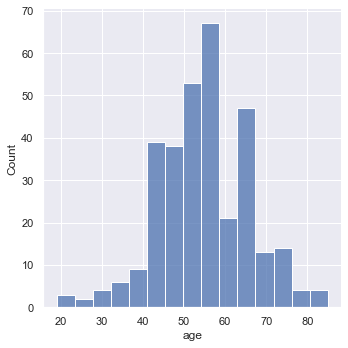

In [249]:
sns.displot(df, x="age")

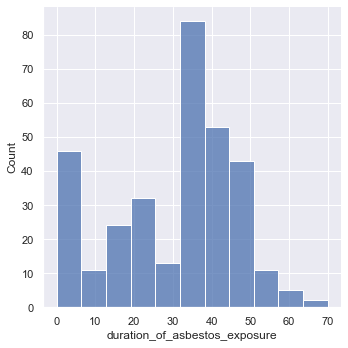

In [250]:
sns.displot(df, x="duration_of_asbestos_exposure")

### Statistiques bivariées

In [251]:
pd.crosstab(df["class_of_diagnosis"], df["asbestos_exposure"], normalize='columns') 

asbestos_exposure,0,1
class_of_diagnosis,,
0,0.795455,0.689286
1,0.204545,0.310714


In [252]:
pd.crosstab(df["class_of_diagnosis"], df["dead_or_not"], normalize='columns') # more healthy (diagnosis=1) that die than not healthy, strange

dead_or_not,0,1
class_of_diagnosis,,
0,0.777778,0.699346
1,0.222222,0.300654


In [253]:
pd.crosstab(df["class_of_diagnosis"], df["city"], normalize='columns') 

city,0,1,2,3,4,5,6,7,8
class_of_diagnosis,,,,,,,,,
0,0.72,0.833333,0.627451,0.52,0.666667,1.0,0.69697,0.846154,1.0
1,0.28,0.166667,0.372549,0.48,0.333333,0.0,0.30303,0.153846,0.0


In [254]:
pd.crosstab(df["class_of_diagnosis"], df["gender"], normalize='columns')

gender,0,1
class_of_diagnosis,,
0,0.619403,0.763158
1,0.380597,0.236842


In [255]:
pd.crosstab(df["class_of_diagnosis"], df["performance_status"], normalize='columns')

performance_status,0,1
class_of_diagnosis,,
0,0.722581,0.686391
1,0.277419,0.313609


In [256]:
pd.crosstab(df["class_of_diagnosis"], df["habit_of_cigarette"])#, normalize='columns')

habit_of_cigarette,0,1,2,3
class_of_diagnosis,,,,
0,126,27,35,40
1,57,10,19,10


In [257]:
pd.crosstab(df["class_of_diagnosis"], df["gender"], normalize='columns') # gender effect

gender,0,1
class_of_diagnosis,,
0,0.619403,0.763158
1,0.380597,0.236842


In [258]:
df = df.drop("performance_status", axis=1)

### Graphic representations

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


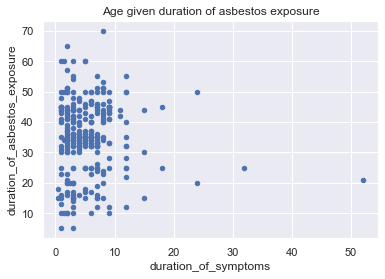

In [259]:
var = df[df["asbestos_exposure"] == 1]

var.plot.scatter(title="Age given duration of asbestos exposure",
         x="duration_of_symptoms",
         y="duration_of_asbestos_exposure")

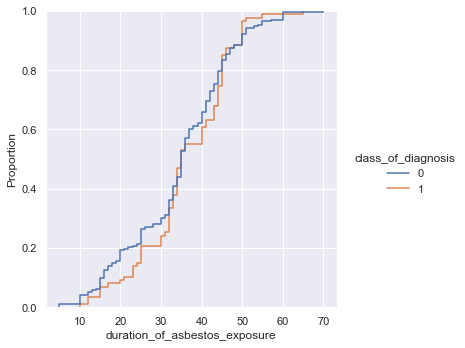

In [260]:
sns.displot(data=var, x="duration_of_asbestos_exposure", hue="class_of_diagnosis", kind="ecdf")

In [261]:
# dataframe init with dummies
dc_init = pd.DataFrame(pd.get_dummies(df_init.drop('class_of_diagnosis', axis=1)))

In [262]:
# dataframe with dummies
dc = pd.DataFrame(pd.get_dummies(df.drop('class_of_diagnosis', axis=1)))
dc.head()

,age,asbestos_exposure,duration_of_asbestos_exposure,cytology,duration_of_symptoms,dyspnoea,ache_on_chest,weakness,white_blood,cell_count,...,city_6,city_7,city_8,lung_side_0,lung_side_1,lung_side_2,habit_of_cigarette_0,habit_of_cigarette_1,habit_of_cigarette_2,habit_of_cigarette_3
0,47.0,1,20.0,1,24.0,1,1,0,8050.0,9,...,0,0,0,1,0,0,0,0,1,0
1,55.0,1,45.0,0,1.0,1,1,1,11200.0,7,...,0,0,0,1,0,0,0,0,0,1
2,29.0,1,23.0,0,1.0,0,0,0,5300.0,12,...,0,0,0,0,1,0,0,0,1,0
3,39.0,1,10.0,0,3.0,0,1,1,7910.0,14,...,0,0,0,1,0,0,1,0,0,0
4,47.0,1,10.0,1,1.5,1,1,0,9120.0,4,...,0,0,0,0,1,0,0,0,0,1


In [263]:
dc = dc.drop(["city_8", "city_5", "city_7", "habit_of_cigarette_1", "habit_of_cigarette_3"], axis=1)

### Correlation matrix

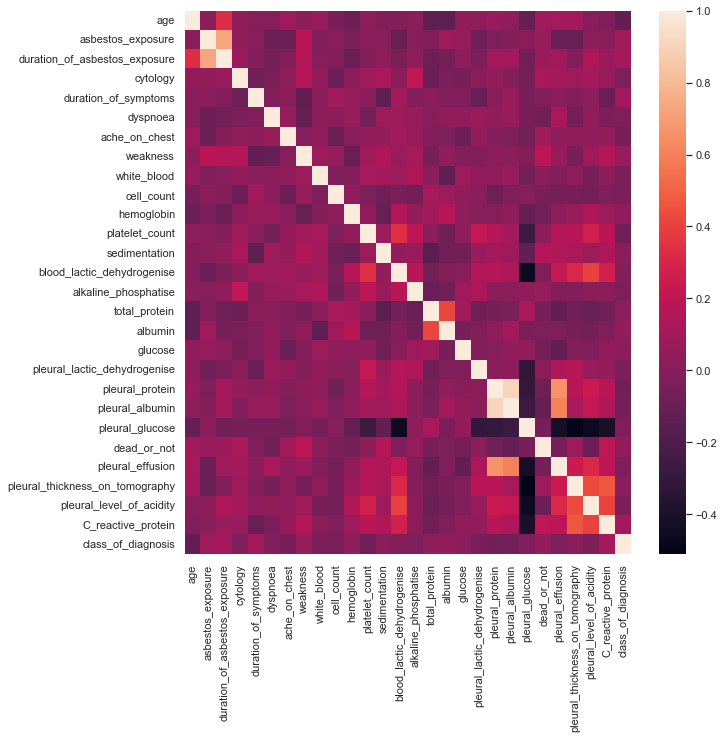

In [264]:
import seaborn as sns

corrMatrix = df.select_dtypes(include='number').corr()

plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(corrMatrix)
plt.show() 

### Cramer's V

Measure of association between two nominal variables. Gives a value between 0 (no association) and +1. It is based on Pearson's chi-squared statistic.

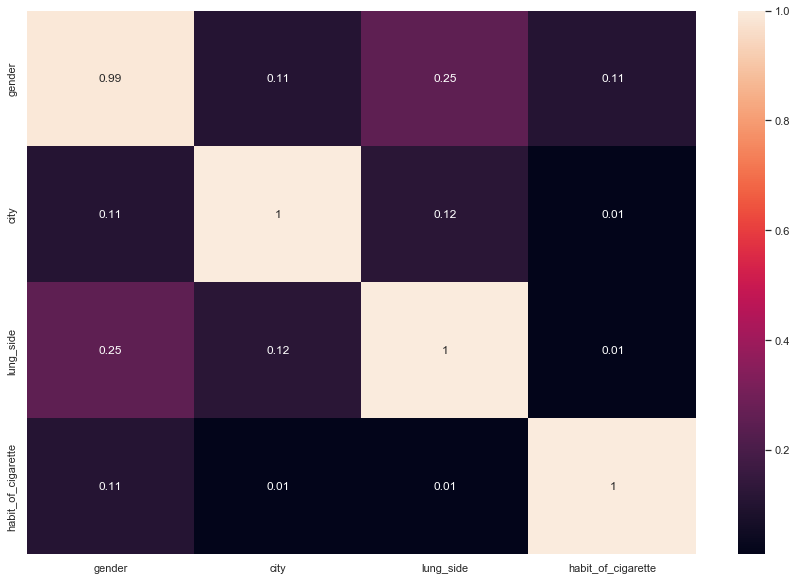

In [265]:
#corrMatrixD = df.select_dtypes(exclude='number').astype('int').apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # use of pd.factorize
# above done directly with Pearson, code's coming from: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
# => gives almost same results

from scipy.stats import chi2_contingency
import numpy as np

# def fonction calculant le V de Cramer
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

# selection uniquement des var de type categorielle
dfCat = df.select_dtypes(exclude='number')
for var1 in dfCat:
  col = []
  for var2 in dfCat :
    cramers = cramers_V(dfCat[var1], dfCat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixD = pd.DataFrame(cramers_results, columns = dfCat.columns, index = dfCat.columns)

plt.rcParams['figure.figsize'] = [15, 10]
sns.heatmap(corrMatrixD, annot=True)
plt.show()

### Cramer's between Y and categorical variables

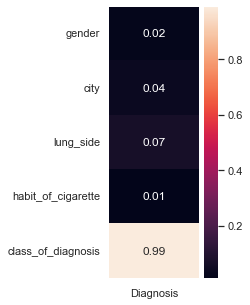

In [266]:
# table with cat var and class_of_diagnosis
dfYcat = pd.concat([df.select_dtypes(exclude='number'), df["class_of_diagnosis"]], axis = 1)
rows = []

for var in dfYcat:
  col = []
  cramers = cramers_V(dfYcat["class_of_diagnosis"], dfYcat[var]) # Cramer's V test
  col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixYcat = pd.DataFrame(cramers_results, columns=["Diagnosis"], index=dfYcat.columns)

plt.rcParams['figure.figsize'] = [2, 5]
sns.heatmap(corrMatrixYcat, annot=True)
plt.show()

## PCA 

In [267]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [268]:
X = dc
scaler = preprocessing.StandardScaler().fit(X) # scaler

X_scaled = pd.DataFrame(scaler.transform(X)) # scaling X
y = df["class_of_diagnosis"]
X_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.704904,0.396412,-0.621441,1.600137,3.939513,0.471849,0.682688,-1.253566,-0.408502,-0.167178,...,-0.385922,-0.432219,-0.289157,-0.282843,-0.505781,1.496663,-1.286755,-0.269903,-1.139242,2.236068
1,0.023319,0.396412,0.903452,-0.624946,-0.943190,0.471849,0.682688,0.797724,0.505760,-0.765693,...,-0.385922,-0.432219,-0.289157,-0.282843,-0.505781,1.496663,-1.286755,-0.269903,-1.139242,-0.447214
2,-2.343406,0.396412,-0.438454,-0.624946,-0.943190,-2.119322,-1.464797,-1.253566,-1.206667,0.730595,...,2.591194,-0.432219,-0.289157,-0.282843,-0.505781,-0.668153,0.777149,-0.269903,-1.139242,2.236068
3,-1.433127,0.396412,-1.231399,-0.624946,-0.518607,-2.119322,0.682688,0.797724,-0.449136,1.329110,...,-0.385922,-0.432219,-0.289157,-0.282843,-0.505781,1.496663,-1.286755,-0.269903,0.877777,-0.447214
4,-0.704904,0.396412,-1.231399,1.600137,-0.837044,0.471849,0.682688,-1.253566,-0.097943,-1.663465,...,-0.385922,-0.432219,-0.289157,-0.282843,-0.505781,-0.668153,0.777149,-0.269903,-1.139242,-0.447214


In [269]:
n_components = 19

#PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

sum(pca.explained_variance_ratio_) # sum of the % of variance explained by earch of the selected components

0.765713027097842

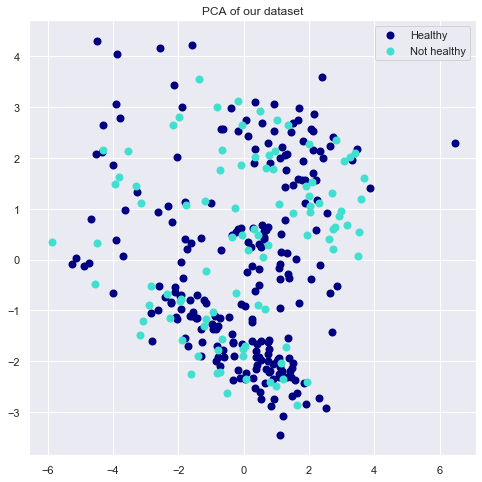

In [270]:
colors = ["navy", "turquoise"]#, "pink"]

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], np.array(["Healthy", "Not healthy"])):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        lw=2,
        label=target_name,
    )

plt.title("PCA of our dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show() # healthy mainly at the bottom of the graph (but not really obvious)

## Modelling

In [271]:
# modelisation modules
from pprint import pprint
from numpy import mean, std
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, to_graphviz
from sklearn.tree import DecisionTreeClassifier  


# plot configuration
plt.rcParams['figure.figsize'] = [10, 10]

In [272]:
# variables used for modelisation
print(dc.columns) # for now we keep variables in terms of dummies

Index(['age', 'asbestos_exposure', 'duration_of_asbestos_exposure', 'cytology',
       'duration_of_symptoms', 'dyspnoea', 'ache_on_chest', 'weakness',
       'white_blood', 'cell_count', 'hemoglobin', 'platelet_count',
       'sedimentation', 'blood_lactic_dehydrogenise', 'alkaline_phosphatise',
       'total_protein', 'albumin', 'glucose', 'pleural_lactic_dehydrogenise',
       'pleural_protein', 'pleural_albumin', 'pleural_glucose', 'dead_or_not',
       'pleural_effusion', 'pleural_thickness_on_tomography',
       'pleural_level_of_acidity', 'C_reactive_protein', 'gender_0',
       'gender_1', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_6',
       'lung_side_0', 'lung_side_1', 'lung_side_2', 'habit_of_cigarette_0',
       'habit_of_cigarette_2'],
      dtype='object')


In [273]:
dc.head()

,age,asbestos_exposure,duration_of_asbestos_exposure,cytology,duration_of_symptoms,dyspnoea,ache_on_chest,weakness,white_blood,cell_count,...,city_1,city_2,city_3,city_4,city_6,lung_side_0,lung_side_1,lung_side_2,habit_of_cigarette_0,habit_of_cigarette_2
0,47.0,1,20.0,1,24.0,1,1,0,8050.0,9,...,0,0,0,0,0,1,0,0,0,1
1,55.0,1,45.0,0,1.0,1,1,1,11200.0,7,...,0,0,0,0,0,1,0,0,0,0
2,29.0,1,23.0,0,1.0,0,0,0,5300.0,12,...,1,0,0,0,0,0,1,0,0,1
3,39.0,1,10.0,0,3.0,0,1,1,7910.0,14,...,0,0,0,0,0,1,0,0,1,0
4,47.0,1,10.0,1,1.5,1,1,0,9120.0,4,...,0,0,0,0,0,0,1,0,0,0


In [274]:
X = dc.copy()
y = df["class_of_diagnosis"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [275]:
X_train.dtypes

age                                float64
asbestos_exposure                    int64
duration_of_asbestos_exposure      float64
cytology                             int64
duration_of_symptoms               float64
dyspnoea                             int64
ache_on_chest                        int64
weakness                             int64
white_blood                        float64
cell_count                           int64
hemoglobin                           int64
platelet_count                     float64
sedimentation                      float64
blood_lactic_dehydrogenise         float64
alkaline_phosphatise               float64
total_protein                      float64
albumin                            float64
glucose                            float64
pleural_lactic_dehydrogenise       float64
pleural_protein                    float64
pleural_albumin                    float64
pleural_glucose                    float64
dead_or_not                          int64
pleural_eff

### Logistic Regression

In [276]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [277]:
# predictions
pred = logistic.predict(X_test)
print(metrics.classification_report(y_test.values, pred))
print(metrics.matthews_corrcoef(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        47
           1       0.56      0.28      0.37        18

    accuracy                           0.74        65
   macro avg       0.66      0.60      0.60        65
weighted avg       0.71      0.74      0.71        65

0.24962446935126478


In [278]:
# Use score method to get accuracy of model
score = logistic.score(X_test, y_test)
print(score)

0.7384615384615385


In [279]:
cm_log = metrics.confusion_matrix(y_test, pred)

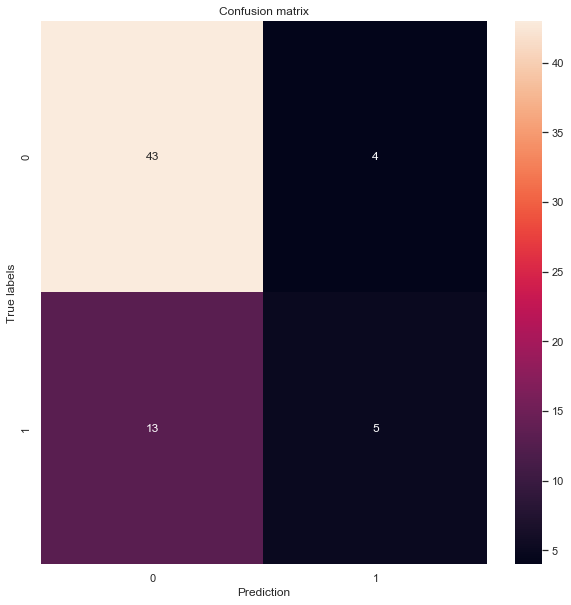

In [280]:
ax = plt.subplot()
sns.heatmap(cm_log,annot=True,fmt="d") 
ax.set_xlabel('Prediction'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

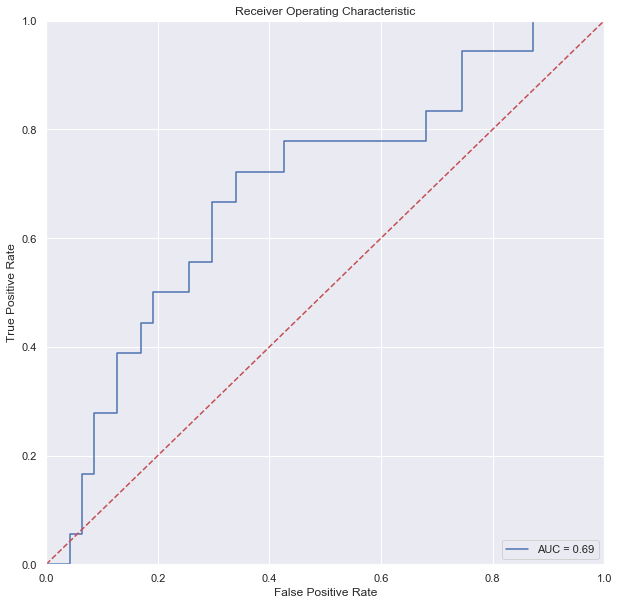

In [281]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Recursive feature selection and Decision Tree
RFE to see if the number of variables kept has an influence on the accuracy score or not.

>10 0.626 (0.097)
>11 0.642 (0.074)
>12 0.661 (0.112)
>13 0.655 (0.094)
>14 0.654 (0.108)
>15 0.589 (0.079)
>16 0.627 (0.095)
>17 0.626 (0.094)
>18 0.636 (0.072)
>19 0.654 (0.092)
>20 0.611 (0.083)
>21 0.629 (0.111)
>22 0.617 (0.085)
>23 0.633 (0.086)
>24 0.611 (0.093)
>25 0.626 (0.096)
>26 0.648 (0.128)
>27 0.645 (0.098)
>28 0.626 (0.100)
>29 0.630 (0.078)
>30 0.645 (0.122)


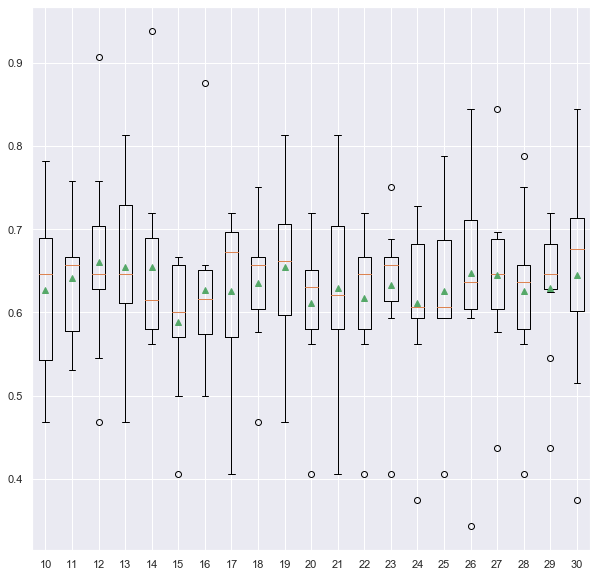

In [286]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(10, 31):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.savefig("rfe-plot.png")
plt.show() # not significant changes in score when increasing the number of variables

In [283]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
# predictions
pred = tree.predict(X_test)
print(metrics.classification_report(y_test, pred))
print(metrics.matthews_corrcoef(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.57      0.44      0.50        18

    accuracy                           0.75        65
   macro avg       0.69      0.66      0.67        65
weighted avg       0.74      0.75      0.74        65

0.3448263988056241


In [76]:
score = tree.score(X_test, y_test)
print(score)

0.7538461538461538


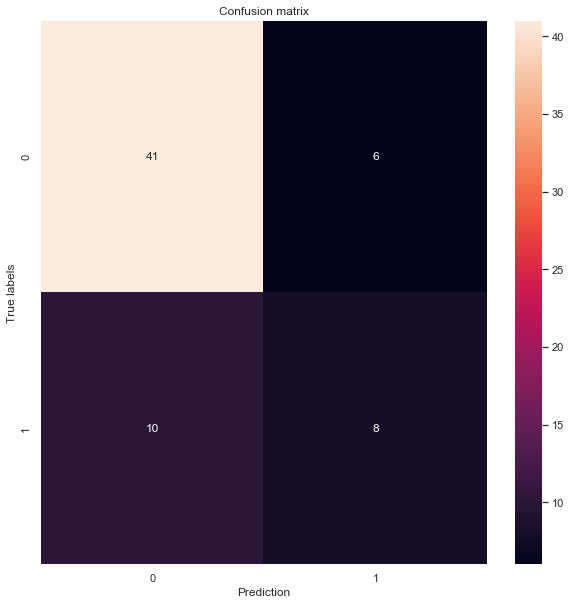

In [77]:
pred = tree.predict(X_test)

cm = metrics.confusion_matrix(y_test, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

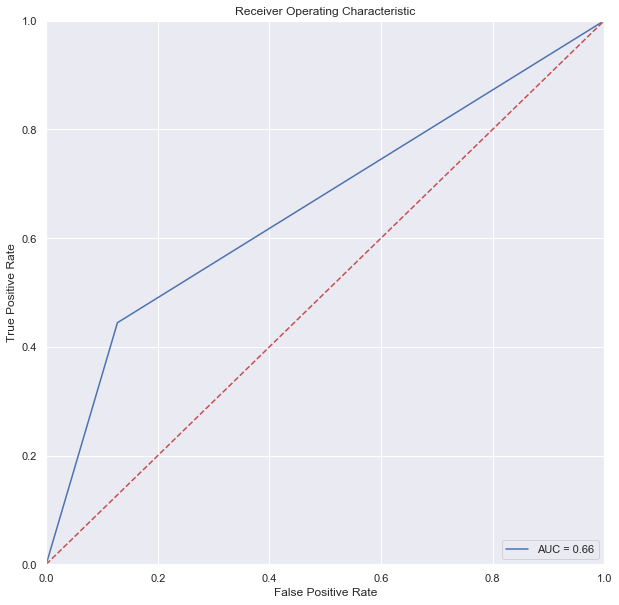

In [78]:
# calculate the fpr and tpr for all thresholds of the classification
probs = tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature Selection with SGDClassifier (SVM and Logistic Regression)

In [79]:
from sklearn import linear_model

In [80]:
tuned_parameters = {'alpha': [10 ** a for a in range(-6, -2)]}
clf_SVM = GridSearchCV(linear_model.SGDClassifier(loss='hinge', penalty='elasticnet', l1_ratio=0.15, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced', random_state=42)
                  , tuned_parameters, cv=10, scoring='f1_macro')
clf_log = GridSearchCV(linear_model.SGDClassifier(loss='log', penalty='elasticnet', l1_ratio=0.15, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced', random_state=42)
                  , tuned_parameters, cv=10, scoring='f1_macro')

#now clf is the best classifier found given the search space
clf_SVM.fit(X_train, y_train)
clf_log.fit(X_train, y_train)
#you can find the best alpha here
print(clf_SVM.best_params_)
print(clf_log.best_params_)

{'alpha': 0.0001}
{'alpha': 1e-05}


In [81]:
for i in range(0, clf_SVM.best_estimator_.coef_.shape[0]):
    top15_SVM = np.argsort(clf_SVM.best_estimator_.coef_[i])[-15:]

for i in range(0, clf_log.best_estimator_.coef_.shape[0]):
    top15_log = np.argsort(clf_log.best_estimator_.coef_[i])[-15:]

In [82]:
clf_SVM.best_estimator_.feature_names_in_[top15_SVM]

array(['hemoglobin', 'asbestos_exposure', 'lung_side_2',
       'pleural_protein', 'gender_0', 'albumin', 'total_protein',
       'duration_of_symptoms', 'pleural_glucose',
       'blood_lactic_dehydrogenise', 'alkaline_phosphatise',
       'duration_of_asbestos_exposure', 'glucose', 'sedimentation',
       'C_reactive_protein'], dtype=object)

In [83]:
clf_log.best_estimator_.feature_names_in_[top15_log]

array(['lung_side_2', 'pleural_protein', 'cell_count', 'gender_0',
       'albumin', 'total_protein', 'white_blood',
       'blood_lactic_dehydrogenise', 'duration_of_symptoms',
       'pleural_glucose', 'duration_of_asbestos_exposure',
       'alkaline_phosphatise', 'glucose', 'sedimentation',
       'C_reactive_protein'], dtype=object)

In [84]:
reg_SVM = linear_model.SGDClassifier(loss='hinge', penalty='elasticnet', l1_ratio=0.15, shuffle=True, verbose=False, n_jobs=10, average=False, class_weight='balanced', random_state=1, alpha = 0.0001)
reg_SVM.fit(X_train, y_train)

# Use score method to get accuracy of model
score = reg_SVM.score(X_test, y_test)
print(score)

0.7230769230769231


### Random forest

In [85]:
# RF (perhaps will improve decision tree performance)
rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = 10,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)   

In [86]:
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(n_jobs=10, oob_score=True, random_state=42)

#### Evaluation des performances

In [87]:
import shap
from sklearn.inspection import permutation_importance

In [88]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train.values, y_train.values), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test.values, y_test.values))) 

R^2 Training Score: 1.00 
OOB Score: 0.70 
R^2 Validation Score: 0.77


In [89]:
rf.feature_importances_

array([0.04443085, 0.0044178 , 0.03857807, 0.00913454, 0.06422633,
       0.00704019, 0.0103632 , 0.0064535 , 0.04319621, 0.03505932,
       0.00930434, 0.07140513, 0.046747  , 0.05063715, 0.04499333,
       0.04190192, 0.03638224, 0.0567149 , 0.04701125, 0.03382405,
       0.03894744, 0.04290982, 0.00270741, 0.00529324, 0.00813023,
       0.00721558, 0.04805657, 0.01256105, 0.01182634, 0.01039225,
       0.01093115, 0.00761438, 0.01646646, 0.00420029, 0.00569711,
       0.00838314, 0.01215123, 0.02847177, 0.00950999, 0.00671321])

In [90]:
df_meso = pd.concat([dc,df['class_of_diagnosis']],axis=1).loc[df['class_of_diagnosis'] == 1]

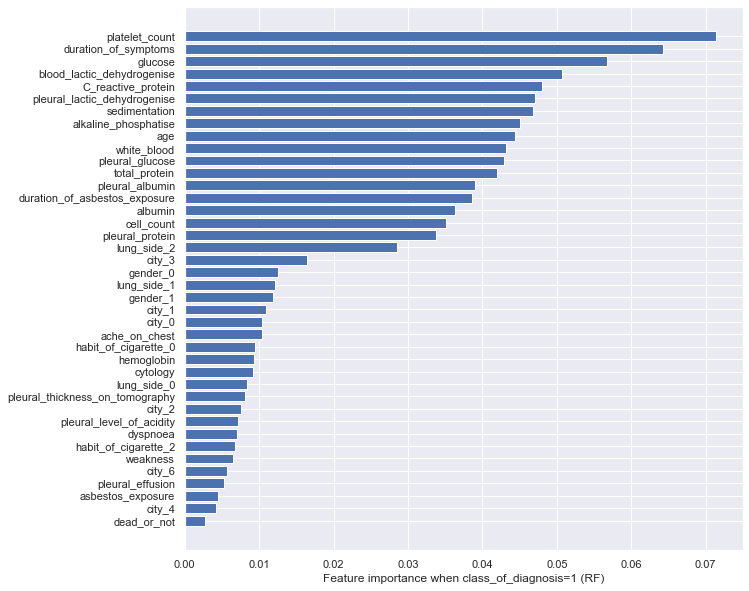

In [91]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_meso.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Feature importance when class_of_diagnosis=1 (RF)")
plt.show()

Above = feature importance when class_of_diagnosis = 1.

Below = permutation feature importance. The permutation feature importance measures the increase in model prediction error after swapping the values of the feature, breaking the relationship between the feature and the true outcome. It highlights which features contribute the most to the generalization power of the inspected model. Hence it tells how important the features are.

In [92]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test.values)

In [93]:
perm_importance = permutation_importance(rf, X_test.values, y_test.values, random_state=9)

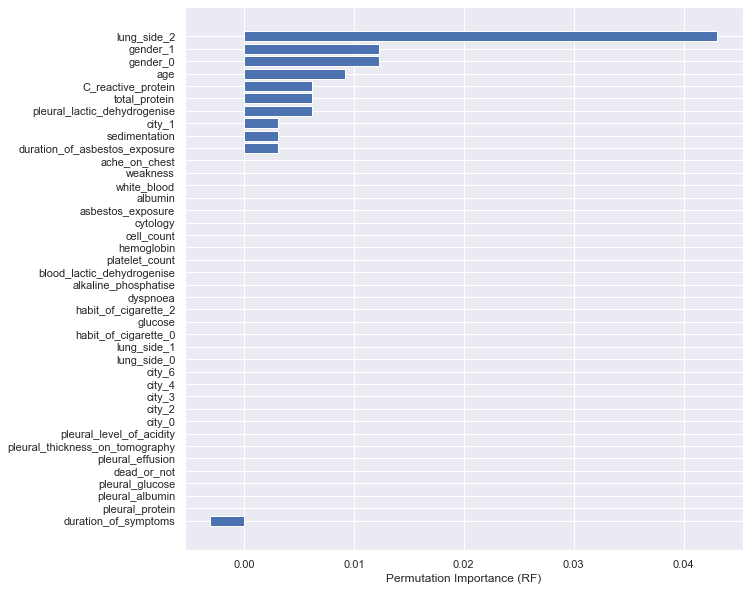

In [94]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_meso.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (RF)")
plt.show()

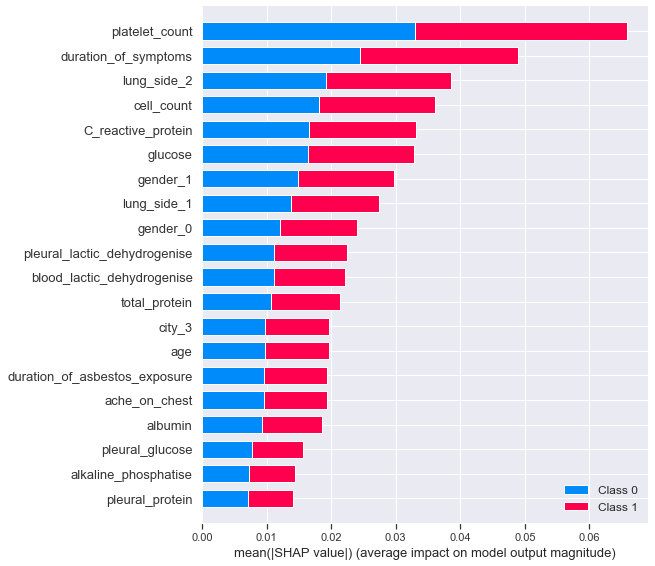

In [95]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

SHAP values interpret the impact of having a certain value  (in our case class_of_diagnosis = 1) for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

Given the three above criterion, the variables with the more importance are:

* platelet count
* duration of symptoms
* glucose
* cell_count
* C_reactive_protein
* lung_side
* gender
* duration_of_asbestos_exposure
* age

In [96]:
# calcul du score
score = rf.score(X_test.values, y_test.values)
print(score)

0.7692307692307693


In [97]:
# predictions
pred = rf.predict(X_test.values)
print(metrics.classification_report(y_test.values, pred))
print(metrics.matthews_corrcoef(y_test, pred)) # good !

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        47
           1       1.00      0.17      0.29        18

    accuracy                           0.77        65
   macro avg       0.88      0.58      0.57        65
weighted avg       0.83      0.77      0.70        65

0.35544913281861495


In [98]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, pred)

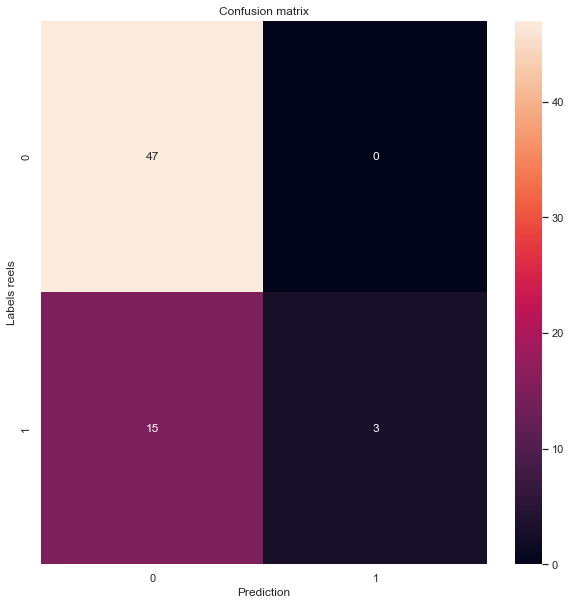

In [99]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('Labels reels'); 
ax.set_title('Confusion matrix'); 
plt.show()

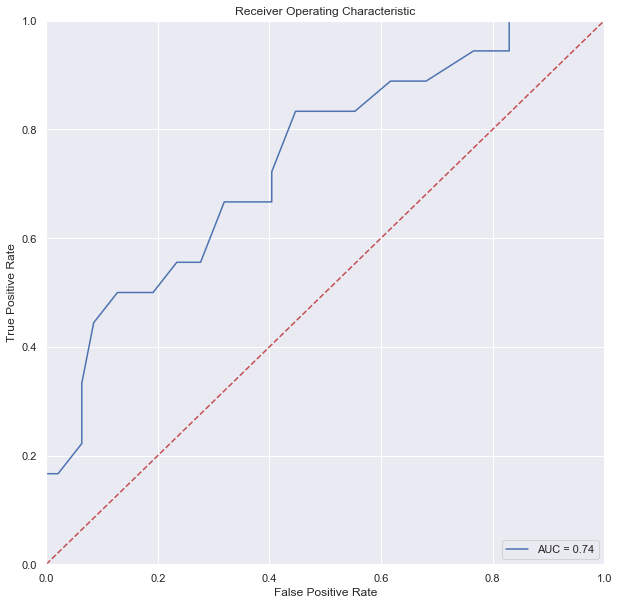

In [100]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test.values)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Removing variables
We remove variables were permutation feature importance = 0 when applied to RF.

In [101]:
X2 = dc.loc[:,("lung_side_2", "duration_of_symptoms", "gender_0", "gender_1", "age", "C_reactive_protein", "city_1", "duration_of_asbestos_exposure", "pleural_lactic_dehydrogenise", "sedimentation", "total_protein")].copy()
y2 = df["class_of_diagnosis"].copy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1, shuffle=True)

In [143]:
X2.shape # 11 variables (including dummies)

(324, 11)

In [102]:
# RF (perhaps will improve decision tree performance)
rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = 10,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)   
rf.fit(X_train2.values, y_train2.values)

RandomForestClassifier(n_jobs=10, oob_score=True, random_state=42)

In [103]:
df_meso = pd.concat([X2,y2],axis=1).loc[df['class_of_diagnosis'] == 1]

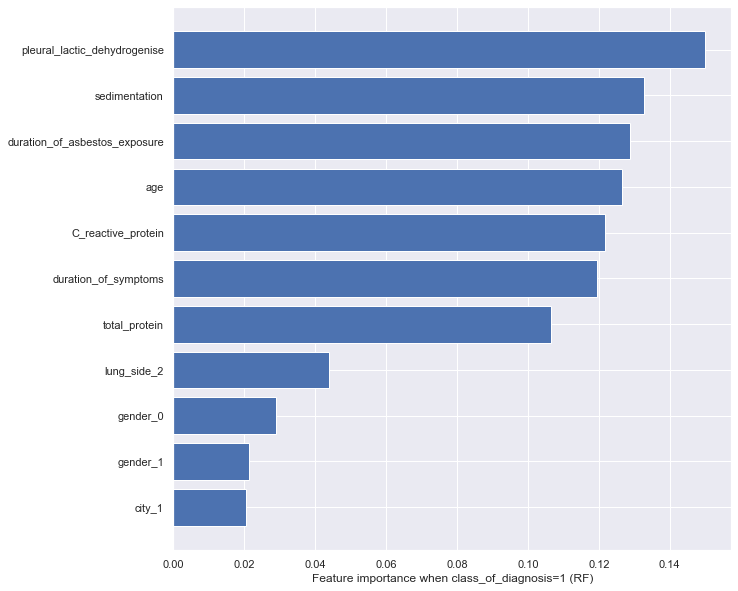

In [104]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_meso.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Feature importance when class_of_diagnosis=1 (RF)")
plt.show()

In [105]:
perm_importance = permutation_importance(rf, X_test2.values, y_test2.values)

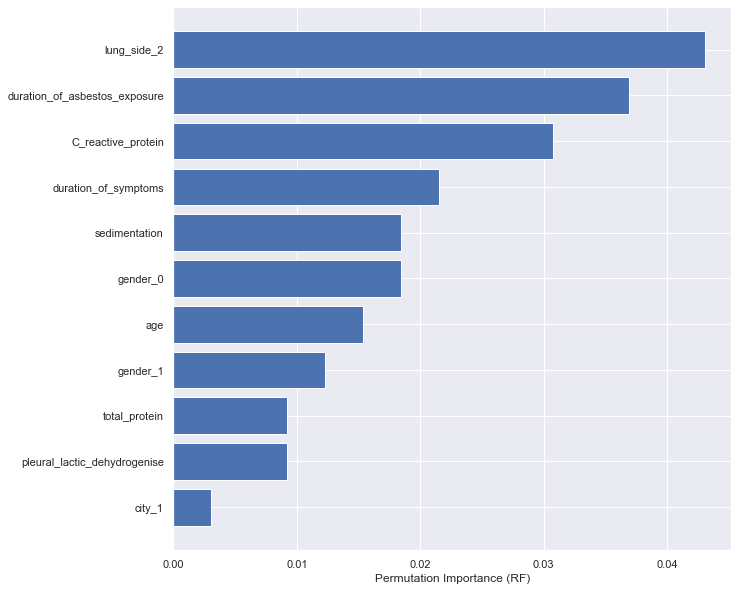

In [106]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_meso.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (RF)")
plt.show()

In [107]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test2.values)

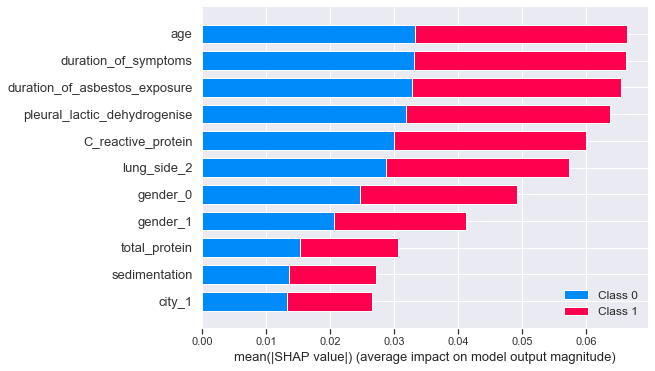

In [108]:
shap.summary_plot(shap_values, X_test2, plot_type="bar")

In [109]:
# calcul du score
score = rf.score(X_test2.values, y_test2.values)
print(score)

0.7846153846153846


In [110]:
# predictions
pred = rf.predict(X_test2.values)
print(metrics.classification_report(y_test2.values, pred))
print(metrics.matthews_corrcoef(y_test2, pred)) # better !

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        47
           1       1.00      0.22      0.36        18

    accuracy                           0.78        65
   macro avg       0.89      0.61      0.62        65
weighted avg       0.83      0.78      0.73        65

0.4137878692380885


In [111]:
# confusion matrix
cm = metrics.confusion_matrix(y_test2, pred)

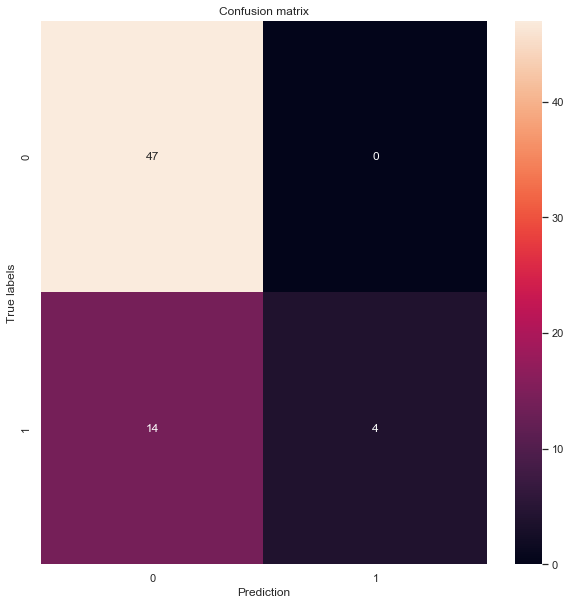

In [112]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

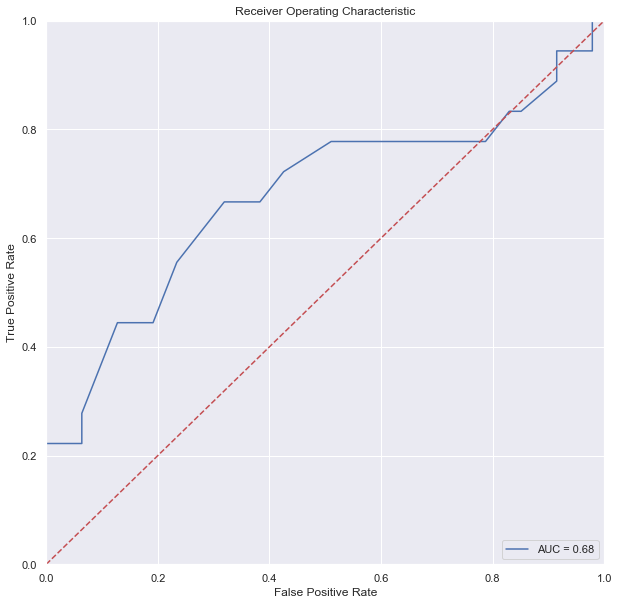

In [113]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test2.values)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() # better !

### XGBoost

In [114]:
clf_xgb = XGBClassifier(n_estimators=100, random_state=42)

clf_xgb.fit(X_train2, y_train2)

XGBClassifier(random_state=42)

In [115]:
# calcul du score
score = clf_xgb.score(X_test2, y_test2)
print(score)

0.7538461538461538


In [116]:
# predictions
pred = clf_xgb.predict(X_test2)
print(metrics.classification_report(y_test2, pred))
print(metrics.matthews_corrcoef(y_test2, pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        47
           1       0.67      0.22      0.33        18

    accuracy                           0.75        65
   macro avg       0.71      0.59      0.59        65
weighted avg       0.74      0.75      0.71        65

0.27775173175961576


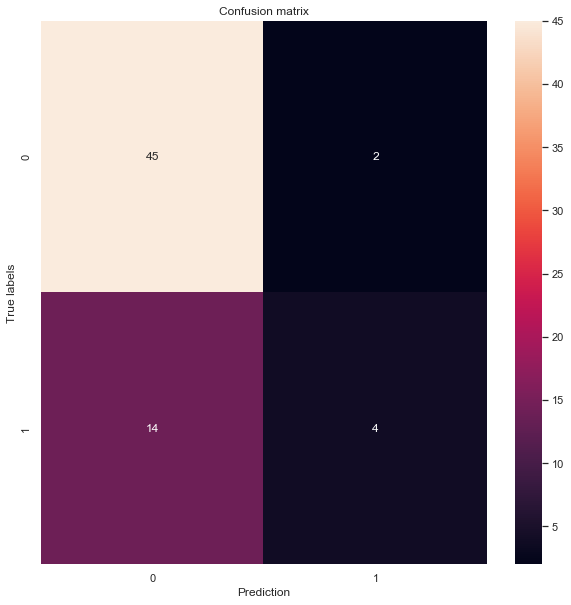

In [117]:
# confusion matrix
cm = metrics.confusion_matrix(y_test2, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

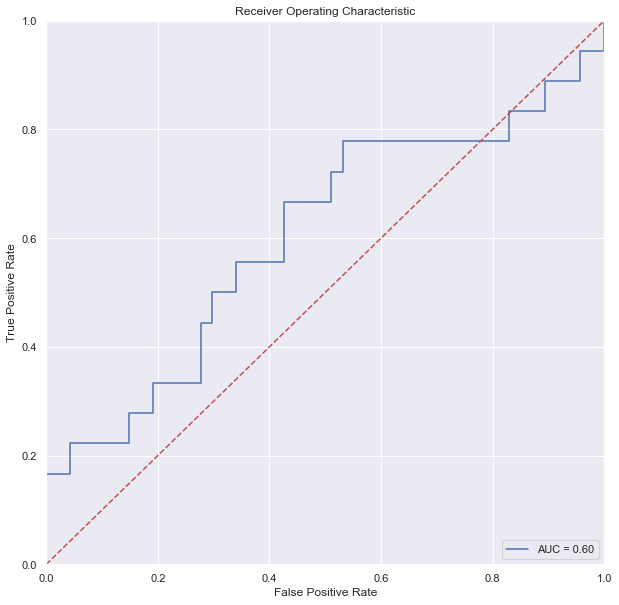

In [118]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_xgb.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [119]:
from sklearn import svm

scaler = preprocessing.StandardScaler()
scaler.fit(X_train2)
X_train_s2 = scaler.transform(X_train2)
X_test_s2 = scaler.transform(X_test2)

In [120]:
clf_svm = svm.SVC(random_state=1, probability=True)
clf_svm.fit(X_train_s2, y_train2)

SVC(probability=True, random_state=1)

In [121]:
# predictions
pred = clf_svm.predict(X_test_s2)
print(metrics.classification_report(y_test2, pred))
print(metrics.matthews_corrcoef(y_test2, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        47
           1       1.00      0.17      0.29        18

    accuracy                           0.77        65
   macro avg       0.88      0.58      0.57        65
weighted avg       0.83      0.77      0.70        65

0.35544913281861495


In [122]:
score = clf_svm.score(X_test_s2, y_test2)
print(score)

0.7692307692307693


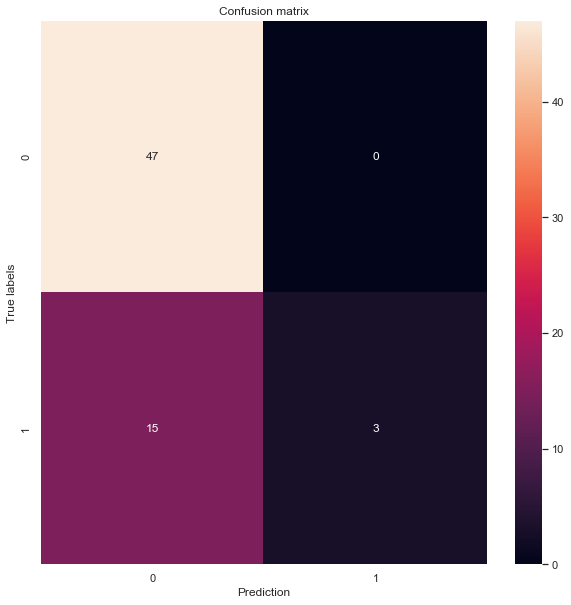

In [123]:
pred = clf_svm.predict(X_test_s2)

cm = metrics.confusion_matrix(y_test2, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

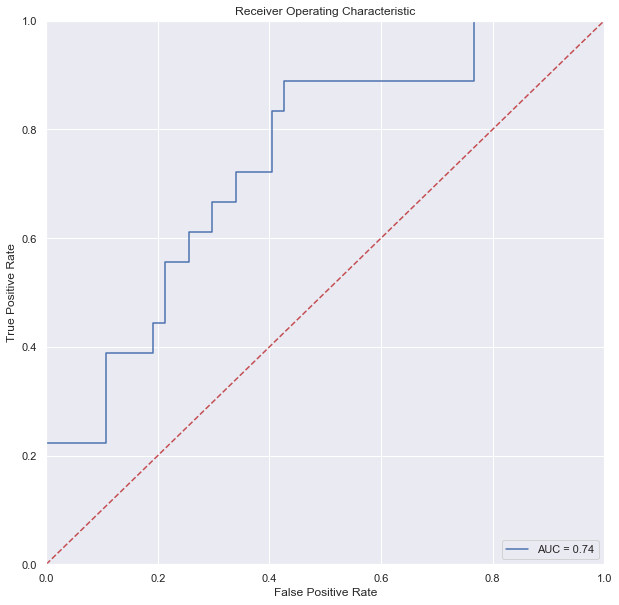

In [124]:
# Classification and ROC analysis (without confidence intervals)

# calculate the fpr and tpr for all thresholds of the classification
probs = clf_svm.predict_proba(X_test_s2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multi-layer perceptron algorithm

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 

In [126]:
# we keep original training and test dataset (more features are better for neural networks)
X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(dc_init, y, test_size=0.2, random_state=1, shuffle=True)

scaler = StandardScaler()  
scaler.fit(X_train_init)
X_train_s = scaler.transform(X_train_init)
X_test_s = scaler.transform(X_test_init)

In [149]:
param_grid = {
    'solver':['adam','sgd'],
    'activation':['tanh','relu'],
    'alpha':[0.0001,0.05],
    'learning_rate':['constant','adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
    'hidden_layer_sizes':[(5,1,2),(10,1,2),(20,1,2),(25,1,2),(75,1,2),(100,1,2),
                          (5,2,2),(10,2,2),(20,2,2),(25,2,2),(75,2,2),(100,2,2),
                          (5,3,2),(10,3,2),(20,3,2),(25,3,2),(75,3,2),(100,3,2)]
}
pprint(param_grid)

# uncomment to run
#optimal_params = GridSearchCV(
#    estimator=MLPClassifier(max_iter=1000, random_state=1),
#    param_grid=param_grid,
#    scoring = 'roc_auc',
#    verbose=0, 
#    n_jobs=10,
#    cv=3
#)

#optimal_params.fit(X_train_s, y_train_init)
#print(optimal_params.best_params_)

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(5, 1, 2),
                        (10, 1, 2),
                        (20, 1, 2),
                        (25, 1, 2),
                        (75, 1, 2),
                        (100, 1, 2),
                        (5, 2, 2),
                        (10, 2, 2),
                        (20, 2, 2),
                        (25, 2, 2),
                        (75, 2, 2),
                        (100, 2, 2),
                        (5, 3, 2),
                        (10, 3, 2),
                        (20, 3, 2),
                        (25, 3, 2),
                        (75, 3, 2),
                        (100, 3, 2)],
 'learning_rate': ['constant', 'adaptive'],
 'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
 'solver': ['adam', 'sgd']}
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 1, 2), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'solver': 'sgd'}


So, after testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `activation='relu'`, `alpha='0.05'`, `hidden_layer_sizes=(100,1,2)`, `learning_rate='adaptative'`, `learning_rate_init='0.05'` and `solver='sgd'`.

In [158]:
clf_mlp = MLPClassifier(activation='relu', alpha=0.05, solver='sgd', 
                        learning_rate='adaptive', learning_rate_init=0.05,
                        hidden_layer_sizes=(100,1,2), max_iter=1000,
                        random_state=42)
clf_mlp.fit(X_train_s, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 1, 2),
              learning_rate='adaptive', learning_rate_init=0.05, max_iter=1000,
              random_state=42, solver='sgd')

In [159]:
# predictions
pred = clf_mlp.predict(X_test_s)
print(metrics.classification_report(y_test_init, pred))
print(metrics.matthews_corrcoef(y_test_init, pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.60      0.33      0.43        18

    accuracy                           0.75        65
   macro avg       0.69      0.62      0.64        65
weighted avg       0.73      0.75      0.73        65

0.30785964799347976


In [160]:
# Use score method to get accuracy of model
score = clf_mlp.score(X_test_s, y_test_init)
print(score)

0.7538461538461538


In [161]:
#clf_mlp.predict_proba(X_test_s)

In [162]:
cm = metrics.confusion_matrix(y_test_init, pred)

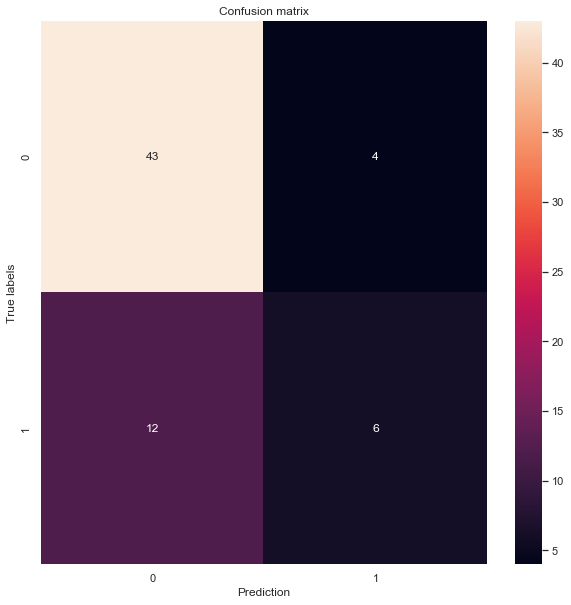

In [163]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

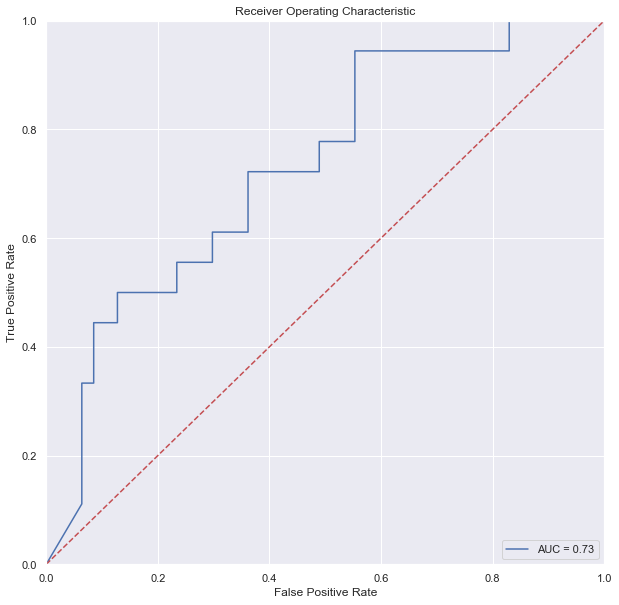

In [164]:
# Classification and ROC analysis (without CV)

# calculate the fpr and tpr for all thresholds of the classification
probs = clf_mlp.predict_proba(X_test_s)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparison of scores
This time, we evaluate accuracy score by cross-validation, using X2 dataset (except for MLP which uses the dataset with more variable).

In [210]:
# scaling for SVM
scaler = preprocessing.StandardScaler()
scaler.fit(X2)
X_s2 = scaler.transform(X2)

# scaling for MLP
scaler = preprocessing.StandardScaler()
scaler.fit(dc_init)
X_init_s = scaler.transform(dc_init)

In [139]:
ml_models = []
ml_models.append(("LR", LogisticRegression(max_iter=10000, random_state = 42)))
ml_models.append(("CART", DecisionTreeClassifier(random_state = 42)))
ml_models.append(("RF", RandomForestClassifier(n_estimators = 100,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)))
ml_models.append(("XGBoost", XGBClassifier(n_estimators=100, random_state=42)))

LR: 0.722794 (0.088834) ; MCC = 0.270723 ; AUC = 0.667102 (0.191652) ; f1 = 0.201028 (0.308029)
CART: 0.626471 (0.097078) ; MCC = 0.231678 ; AUC = 0.539432 (0.139590) ; f1 = 0.304380 (0.233600)
RF: 0.738419 (0.095307) ; MCC = 0.413788 ; AUC = 0.583248 (0.216990) ; f1 = 0.284921 (0.301526)
XGBoost: 0.688787 (0.097494) ; MCC = 0.277752 ; AUC = 0.501269 (0.222475) ; f1 = 0.224899 (0.278879)
SVM: 0.741544 (0.098877) ; MCC = 0.355449 ; AUC = 0.590701 (0.200874) ; f1 = 0.154167 (0.331532)
MLP: 0.666544 (0.095568) ; MCC = 0.307860 ; AUC = 0.615502 (0.171481) ; f1 = 0.321804 (0.200389)


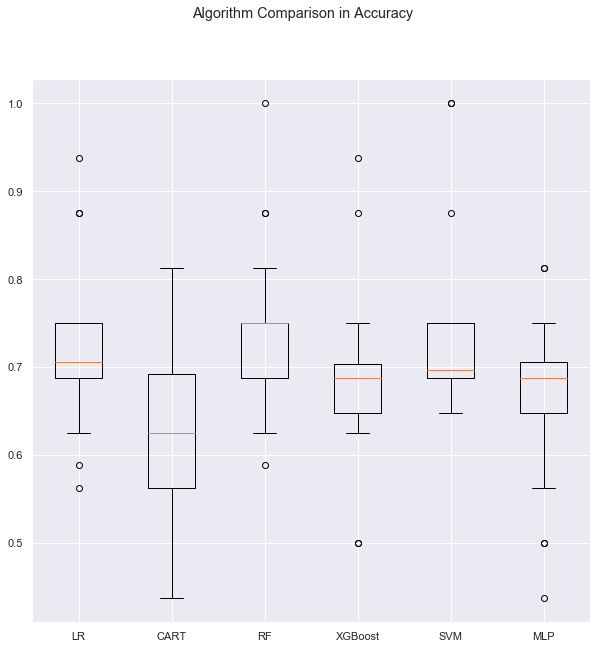

In [165]:
# evaluate each model in turn
results = []
names = []

kfold = StratifiedKFold(n_splits=20)
for name, model in ml_models:
    model.fit(X_train2.values, y_train2)
    cv_results = cross_val_score(model, X2.values, y2, cv=kfold, scoring='accuracy')
    auc_results = cross_val_score(model, X2.values, y2, cv=kfold, scoring='roc_auc')
    f1_results = cross_val_score(model, X2.values, y2, cv=kfold, scoring='f1')
    y_pred = model.predict(X_test2.values)
    matthews_coef = metrics.matthews_corrcoef(y_test2, y_pred)
    
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f) ; MCC = %f ; AUC = %f (%f) ; f1 = %f (%f)" % (name, cv_results.mean(), cv_results.std(), matthews_coef, auc_results.mean(), auc_results.std(), f1_results.mean(), f1_results.std())
    print(msg)

# MLP and SVM classifiers need scaled date
model = svm.SVC(random_state=42)
model.fit(X_train_s2, y_train2)
y_pred = model.predict(X_test_s2)
matthews_coef = metrics.matthews_corrcoef(y_test2, y_pred)
cv_results = cross_val_score(model, X_s2, y2, cv=kfold, scoring='accuracy')
auc_results = cross_val_score(model, X_s2, y2, cv=kfold, scoring='roc_auc')
f1_results = cross_val_score(model, X_s2, y2, cv=kfold, scoring='f1')

results.append(cv_results)
names.append("SVM")

msg = "%s: %f (%f) ; MCC = %f ; AUC = %f (%f) ; f1 = %f (%f)" % ("SVM", cv_results.mean(), cv_results.std(), matthews_coef, auc_results.mean(), auc_results.std(), f1_results.mean(), f1_results.std())
print(msg)

model = MLPClassifier(activation='relu', alpha=0.05, solver='sgd', 
                        learning_rate='adaptive', learning_rate_init=0.05,
                        hidden_layer_sizes=(100,1,2), max_iter=1000,
                        random_state=42)
model.fit(X_train_s, y_train_init)
y_pred = model.predict(X_test_s)
matthews_coef = metrics.matthews_corrcoef(y_test_init, y_pred)
cv_results = cross_val_score(model, X_init_s, y, cv=kfold, scoring='accuracy')
auc_results = cross_val_score(model, X_init_s, y, cv=kfold, scoring='roc_auc')
f1_results = cross_val_score(model, X_init_s, y, cv=kfold, scoring='f1')

results.append(cv_results)
names.append("MLP")

msg = "%s: %f (%f) ; MCC = %f ; AUC = %f (%f) ; f1 = %f (%f)" % ("MLP", cv_results.mean(), cv_results.std(), matthews_coef, auc_results.mean(), auc_results.std(), f1_results.mean(), f1_results.std())
print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison in Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SVM and RF are doing better than others on average (looking at accuracy and MCC). 

#### Hyperparameters tuning for SVM

In [142]:
param_grid = {'C': [0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.01, 0.1, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

optimal_params = GridSearchCV(
    estimator=svm.SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring = 'roc_auc',
    #refit=True,
    verbose = 2, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(X_train_s2, y_train2)
print(optimal_params.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.5, 'gamma': 0.01, 'kernel': 'sigmoid'}


In [207]:
svm_opt = svm.SVC(C=0.5, gamma=0.01, kernel="sigmoid", random_state=42)
svm_opt.fit(X_train_s2, y_train2) 

SVC(C=0.5, gamma=0.01, kernel='sigmoid', random_state=42)

In [208]:
# score
score = svm_opt.score(X_test_s2, y_test2)
print(score)

0.7230769230769231


In [209]:
# predictions
pred = svm_opt.predict(X_test_s2)
print(metrics.classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        47
           1       0.00      0.00      0.00        18

    accuracy                           0.72        65
   macro avg       0.36      0.50      0.42        65
weighted avg       0.52      0.72      0.61        65



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


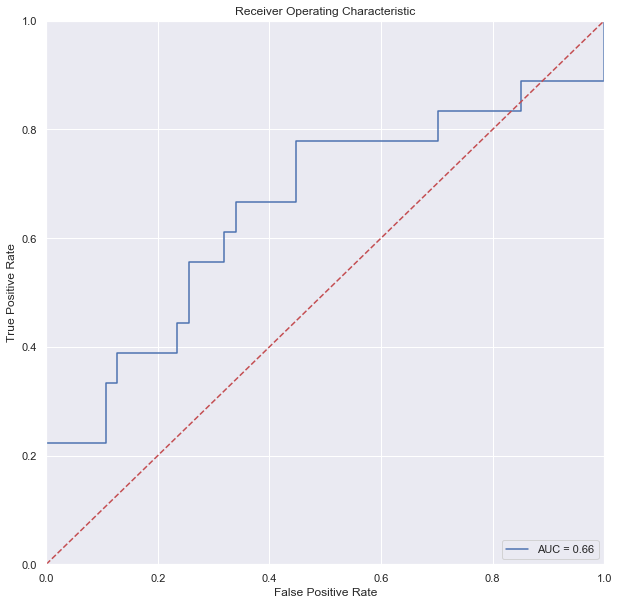

In [198]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test_s2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Hyperparameters tuning for RF algorithm 

In [167]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [171]:
param_grid = {
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
pprint(param_grid)

optimal_params = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=10, random_state=42),
    param_grid=param_grid,
    scoring = 'roc_auc',
    verbose=2, 
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train2, y_train2)
print(optimal_params.best_params_)

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': range(50, 300, 50)}
Fitting 3 folds for each of 180 candidates, totalling 540 fits
{'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


So, after testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `bootstrap=False`, `max_features='auto'`, `min_samples_leaf=4`, `min_samples_split=2` and `n_estimators=50`.

In [199]:
rf_opt = RandomForestClassifier(bootstrap=False,
                                n_jobs=10,
                                n_estimators=50, 
                                min_samples_leaf=4,
                                min_samples_split=2,
                                max_features='auto',
                                random_state=42)
rf_opt.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, n_estimators=50,
                       n_jobs=10, random_state=42)

In [200]:
# calcul du score
score = rf_opt.score(X_test2, y_test2)
print(score)

0.7538461538461538


In [201]:
# predictions
pred = rf_opt.predict(X_test2)
print(metrics.classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        47
           1       0.75      0.17      0.27        18

    accuracy                           0.75        65
   macro avg       0.75      0.57      0.56        65
weighted avg       0.75      0.75      0.69        65



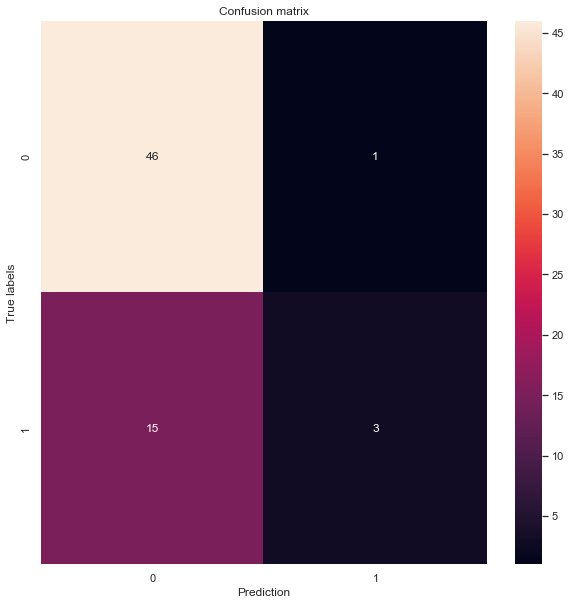

In [202]:
# confusion matrix
cm = metrics.confusion_matrix(y_test2, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

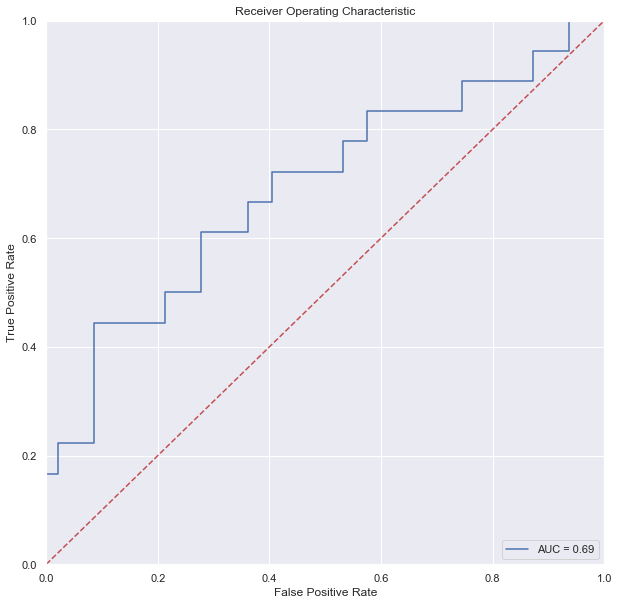

In [203]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_opt.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

# ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Tuning is not improving much performance.